In [1]:
import bamt.preprocessors
import bamt.networks as Nets
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from itertools import product
from pgmpy.estimators import  K2Score
import numpy as np
import seaborn as sns

from auxiliary import *

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTclone/BAMT/experiments2/images'

Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years

In [2]:
data = pd.read_csv("abalone.data", sep=',', names=['sex', 'length', 'diameter', 'height', 'W_weight', 'S_weight', 'viscera_weight', 'shell_weight', 'rings'])
data.head(10)

,sex,length,diameter,height,W_weight,S_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


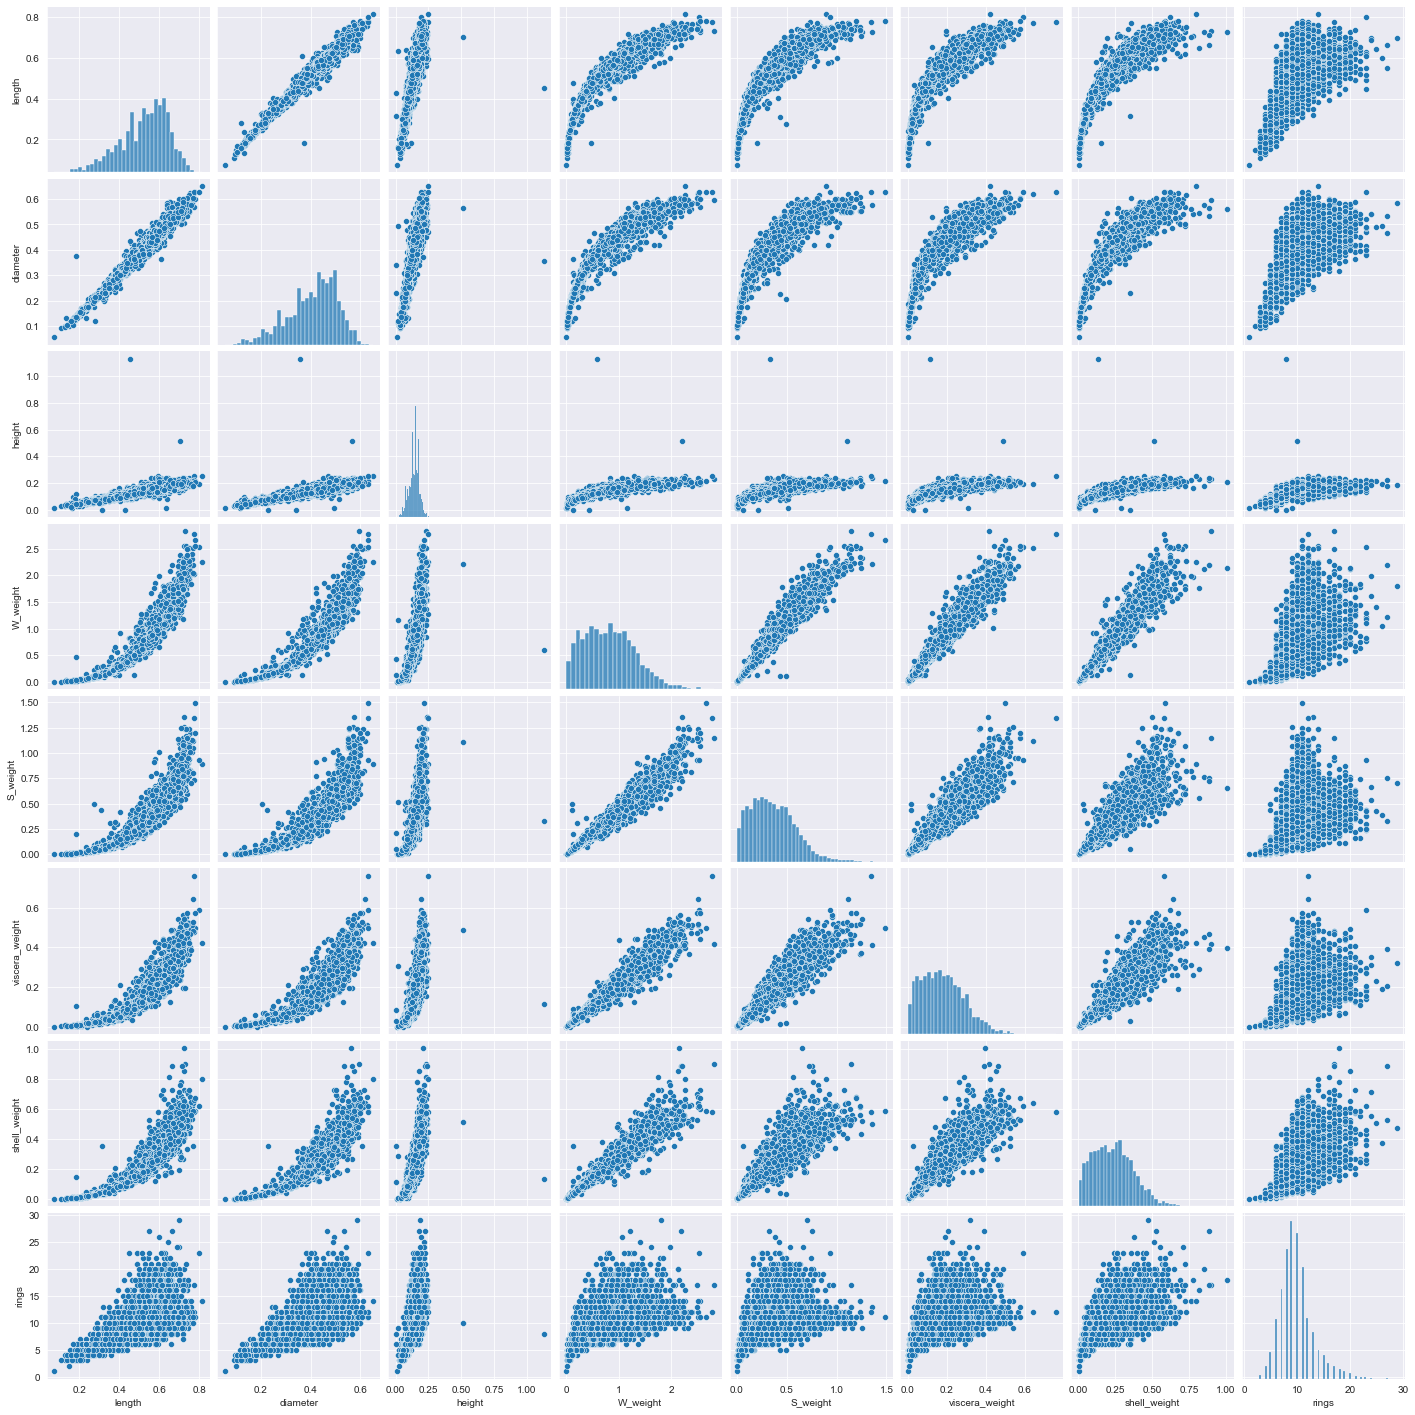

In [3]:
sns.pairplot(data.iloc[:, 1:])

In [3]:
data.shape

(4177, 9)

In [4]:
data.groupby('sex').count()

,length,diameter,height,W_weight,S_weight,viscera_weight,shell_weight,rings
sex,,,,,,,,
F,1307,1307,1307,1307,1307,1307,1307,1307
I,1342,1342,1342,1342,1342,1342,1342,1342
M,1528,1528,1528,1528,1528,1528,1528,1528


In [4]:
data['sex'] = data['sex'].map({'F': 0, 'M': 1, 'I': 2})

In [5]:
np.random.seed(SEED)
random.seed(SEED)

qresult = construct_by_quantiles(data, ['sex'])
bn = qresult['bn']

c=bn.plot2(imagespath , "bn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


![](images/bn15.png)

In [11]:
c=bn.plot_for_specific_nodes(['sex0', 'sex1', 'sex2'], imagespath , "subbn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [6]:
np.random.seed(SEED)
random.seed(SEED)

uresult = construct_by_uniform(data, ['sex'])
ubn = uresult['bn']

c=ubn.plot2(imagespath , "ubn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


![](images/ubn15.png)

In [12]:
c=ubn.plot_for_specific_nodes(['sex0', 'sex1', 'sex2'], imagespath , "sububn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [7]:
np.random.seed(SEED)
random.seed(SEED)

kresult = construct_by_kmeans(data, ['sex'])
kbn = kresult['bn']

c=kbn.plot2(imagespath , "kbn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


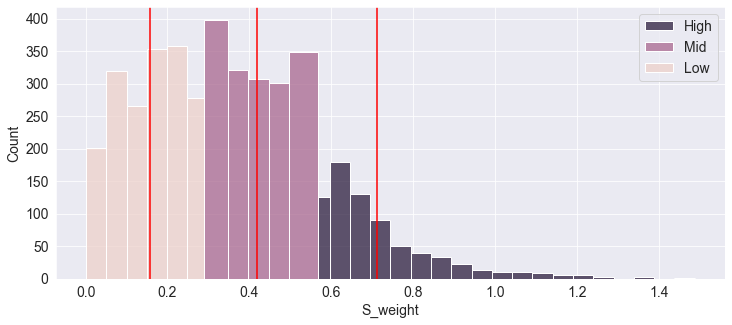

In [41]:
print_histogram('S_weight')

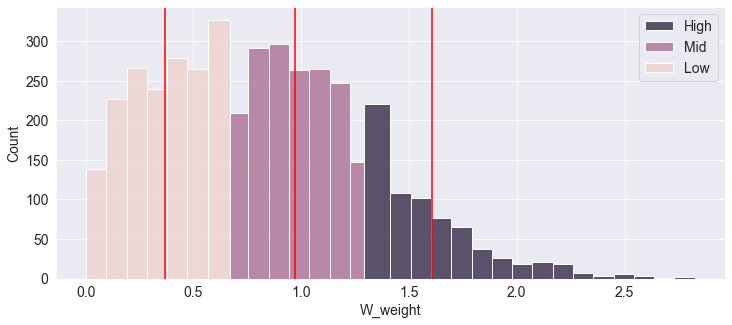

In [42]:
print_histogram('W_weight')

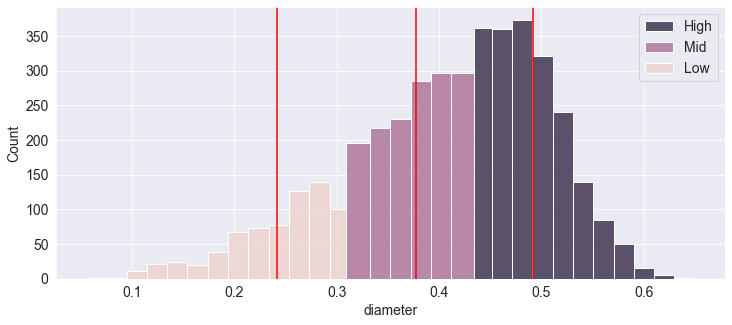

In [43]:
print_histogram('diameter')

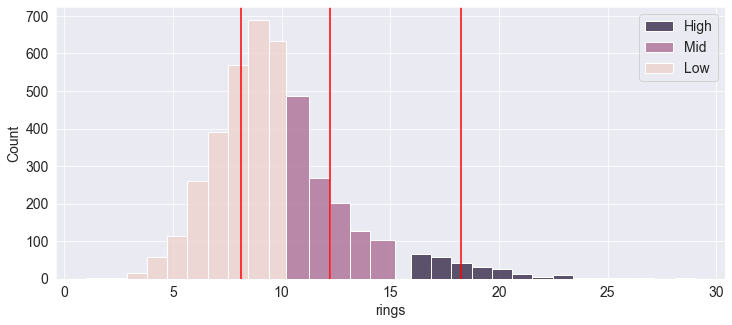

In [44]:
print_histogram('rings')

![](images/kbn15.png)

In [13]:
c=kbn.plot_for_specific_nodes(['sex0', 'sex1', 'sex2'], imagespath , "subkbn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [9]:
all_edges = list(set(["-".join(e) for e in bn.edges + ubn.edges + kbn.edges])) #white list for the next bn

In [8]:
kencoder, data_kdiscretized_enc = kresult['encoder'], kresult['disc_data']

In [10]:
tradeoffbn = Nets.DiscreteBN()
nodes = list(dict.fromkeys(sum([x.split("-") for x in all_edges], start=[])))
tradeoffbn.add_nodes(dict(types={cat: 'disc' for _, cat in enumerate(nodes)}))

params = {'white_list': [(x[0], x[1]) for x in [y.split("-") for y in all_edges]]}

tradeoffbn.add_edges(data_kdiscretized_enc.astype("int32"), scoring_function=("K2",K2Score), params=params)

c=tradeoffbn.plot2(imagespath, "tbn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

  0%|          | 0/1000000 [00:00<?, ?it/s]

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


![](images/tbn15.png)

In [14]:
c=tradeoffbn.plot_for_specific_nodes(['sex0', 'sex1', 'sex2'], imagespath , "subtbn15.html", custom_mapper={'sex': {0: 'Female', 1: 'Male', 2: 'Infant'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [50]:
from imblearn.over_sampling import KMeansSMOTE

In [51]:
oversampler = KMeansSMOTE(random_state=42,k_neighbors=5)

In [52]:
info = {'types': None, 'signs': None}

In [90]:
info['types'] = {k: v for k, v in zip(data.columns, ['cont']*data.shape[1])}
info['signs'] = {k: v for k, v in zip(data.columns, ['pos']*data.shape[1])}
info['types']['sex']='disc'

In [91]:
bn_oversampler = Nets.HybridBN(has_logit=True, use_mixture=True)
bn_oversampler.add_nodes(info)

In [92]:
data_kdiscretized_enc

,S_weight0,S_weight1,S_weight2,W_weight0,W_weight1,W_weight2,diameter0,diameter1,diameter2,height0,...,rings2,shell_weight0,shell_weight1,shell_weight2,viscera_weight0,viscera_weight1,viscera_weight2,sex0,sex1,sex2
0,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
4173,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
4174,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,1,0
4175,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [93]:
data_kdiscretized1 = data_kdiscretized.copy(deep=True)
for k, feat in enumerate(kencoder.feature_names_in_):
    i = 3*k
    data_kdiscretized1[feat] = data_kdiscretized_enc[feat+'1']+2*data_kdiscretized_enc[feat+'2']
data_kdiscretized1

,sex,length,diameter,height,W_weight,S_weight,viscera_weight,shell_weight,rings
0,1,1,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0
2,0,1,1,0,1,0,1,1,0
3,1,1,1,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
4172,0,2,2,0,1,1,1,1,1
4173,1,2,2,0,1,1,1,1,0
4174,1,2,2,0,1,1,2,1,0
4175,0,2,2,0,1,1,1,1,0


In [94]:
bn_oversampler.add_edges(data_kdiscretized1,  scoring_function=("K2",K2Score))

2023-02-26 21:32:17,106 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8
2023-02-26 21:32:17,108 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8
2023-02-26 21:32:17,109 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8
2023-02-26 21:32:17,110 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8
2023-02-26 21:32:17,112 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8
2023-02-26 21:32:17,114 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8
2023-02-26 21:32:17,115 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8
2023-02-26 21:32:17,116 | ERROR    | GraphUtils.py-nodes_types-0033 | Unsupported data type. Dtype: uint8


  0%|          | 0/1000000 [00:00<?, ?it/s]

In [95]:
bn_oversampler.edges

[['length', 'S_weight'],
 ['length', 'viscera_weight'],
 ['diameter', 'length'],
 ['diameter', 'sex'],
 ['diameter', 'W_weight'],
 ['diameter', 'shell_weight'],
 ['height', 'sex'],
 ['height', 'S_weight'],
 ['W_weight', 'S_weight'],
 ['W_weight', 'viscera_weight'],
 ['W_weight', 'length'],
 ['viscera_weight', 'sex'],
 ['shell_weight', 'W_weight'],
 ['rings', 'shell_weight'],
 ['rings', 'sex'],
 ['rings', 'S_weight'],
 ['rings', 'diameter']]

In [96]:
bn_oversampler.fit_parameters(data=data_kdiscretized)

In [97]:
np.random.seed(42)
bn_oversampler.sample(n=5)

100%|██████████| 5/5 [00:00<00:00, 72.39it/s]


,height,rings,diameter,shell_weight,W_weight,length,S_weight,viscera_weight,sex
0,0.119365,16.626511,0.489808,0.430543,1.251402,0.616403,0.391723,0.324392,0
1,0.139862,9.797742,0.443417,0.273302,0.900135,0.565540,0.399096,0.229336,2
2,0.122072,10.175643,0.479610,0.315427,1.458631,0.637957,0.737376,0.340280,0
3,0.052468,7.692001,0.244670,0.049828,0.176620,0.336930,0.075899,0.034257,2
4,0.107487,13.669315,0.532674,0.382023,1.220576,0.647182,0.563347,0.277655,1


In [98]:
data_kdiscretized_enc

,S_weight0,S_weight1,S_weight2,W_weight0,W_weight1,W_weight2,diameter0,diameter1,diameter2,height0,...,rings2,shell_weight0,shell_weight1,shell_weight2,viscera_weight0,viscera_weight1,viscera_weight2,sex0,sex1,sex2
0,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
1,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,1,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
4,1,0,0,1,0,0,1,0,0,1,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4172,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0
4173,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
4174,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,0,1,0,1,0
4175,0,1,0,0,1,0,0,0,1,1,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
bn_oversampler.sam